In [131]:
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
df = pd.read_csv("google_stock_price_dataset.csv")
df.head()

,Month Starting,Open,High,Low,Close,Change %,Avg. Volume
0,"Dec. 01, 2022",101.38,102.59,100.67,101.28,-0.17%,"21,771,536"
1,"Nov. 01, 2022",95.59,101.45,83.45,101.45,7.17%,"28,294,944"
2,"Oct. 03, 2022",97.22,105.10,91.90,94.66,-1.55%,"27,843,110"
3,"Sep. 01, 2022",109.20,112.64,96.03,96.15,-11.91%,"25,381,194"
4,"Aug. 01, 2022",115.53,123.26,108.80,109.15,-6.42%,"18,737,451"


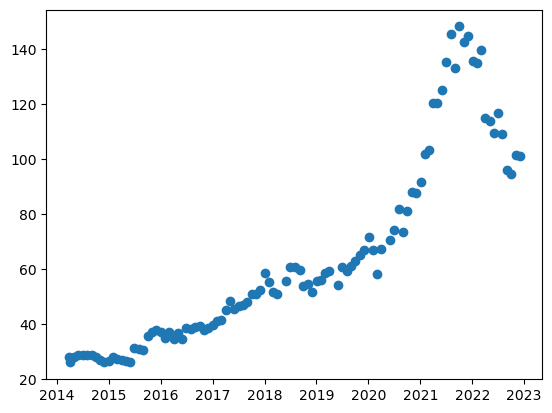

In [133]:
df['Month Starting'] = pd.to_datetime(df['Month Starting'], errors='coerce')

plt.scatter(df['Month Starting'], df['Close'])

In [134]:
display(df.info())
df.fillna(df.mean(), inplace=True)
df = df.iloc[0:-2]
df['Month Starting'][31] = pd.to_datetime('2020-05-01')
df['Month Starting'][43] = pd.to_datetime('2019-05-01')
df['Month Starting'][55] = pd.to_datetime('2018-05-01')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month Starting  103 non-null    datetime64[ns]
 1   Open            106 non-null    float64       
 2   High            106 non-null    float64       
 3   Low             106 non-null    float64       
 4   Close           106 non-null    float64       
 5   Change %        106 non-null    object        
 6   Avg. Volume     106 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 6.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month Starting  106 non-null    datetime64[ns]
 1   Open            106 non-null    float64       
 2   High            106 non-null    float64       
 3   Low             106 non-null    float64       
 4   Close           106 non-null    float64       
 5   Change %        106 non-null    object        
 6   Avg. Volume     106 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 5.9+ KB


/var/folders/y0/kd_yg4fn0z3f7f47nhkbnk5c0000gn/T/ipykernel_47288/1137296554.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
/var/folders/y0/kd_yg4fn0z3f7f47nhkbnk5c0000gn/T/ipykernel_47288/1137296554.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)
/var/folders/y0/kd_yg4fn0z3f7f47nhkbnk5c0000gn/T/ipykernel_47288/1137296554.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month Starting'][43] = 

None

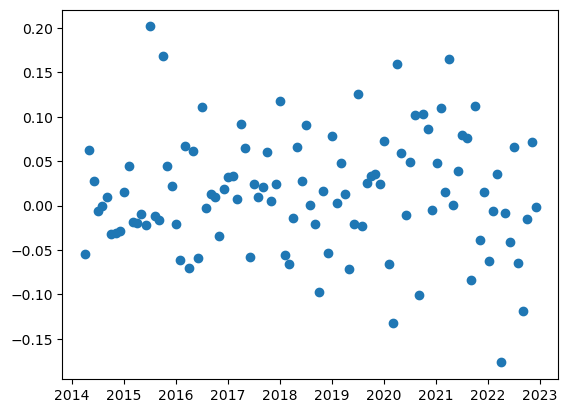

In [135]:
df['Return'] = df['Close'].pct_change(-1)
plt.scatter(df['Month Starting'], df['Return'])

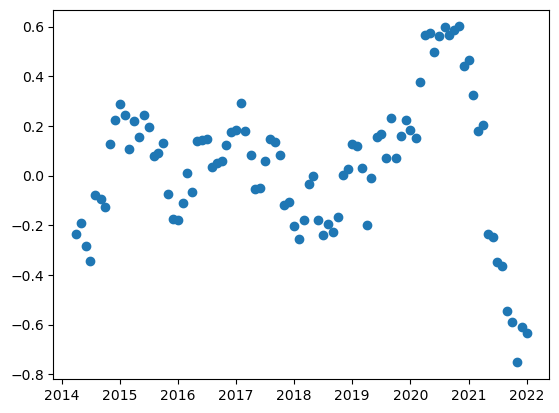

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Return'] = scaler.fit_transform(df['Return'].values.reshape(-1,1))
df['Rolling Average'] = df['Return'].rolling(window=12).mean()
plt.scatter(df['Month Starting'], df['Rolling Average'])

In [137]:
#Handling Unexpected Missing Values
display(df.tail())
df['Return'].fillna(df['Return'].mean(), inplace=True)
display(df.tail())

,Month Starting,Open,High,Low,Close,Change %,Avg. Volume,Return,Rolling Average
101,2014-07-01,28.92,29.98,28.25,28.58,-0.64%,"31,411,358",-0.318260,-0.345665
102,2014-06-02,28.03,29.12,26.94,28.76,2.75%,"36,121,936",0.200409,-0.282555
103,2014-05-01,26.35,28.39,25.16,27.99,6.31%,"34,808,252",0.746228,-0.189474
104,2014-04-01,27.93,30.24,25.14,26.33,-5.44%,"64,037,909",-1.060425,-0.234573
105,2014-03-27,28.40,28.40,27.65,27.85,0.00%,"432,192",NaN,NaN


,Month Starting,Open,High,Low,Close,Change %,Avg. Volume,Return,Rolling Average
101,2014-07-01,28.92,29.98,28.25,28.58,-0.64%,"31,411,358",-3.182604e-01,-0.345665
102,2014-06-02,28.03,29.12,26.94,28.76,2.75%,"36,121,936",2.004088e-01,-0.282555
103,2014-05-01,26.35,28.39,25.16,27.99,6.31%,"34,808,252",7.462277e-01,-0.189474
104,2014-04-01,27.93,30.24,25.14,26.33,-5.44%,"64,037,909",-1.060425e+00,-0.234573
105,2014-03-27,28.40,28.40,27.65,27.85,0.00%,"432,192",4.229421e-18,NaN


/Users/hangyulson/opt/anaconda3/envs/comp4221/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


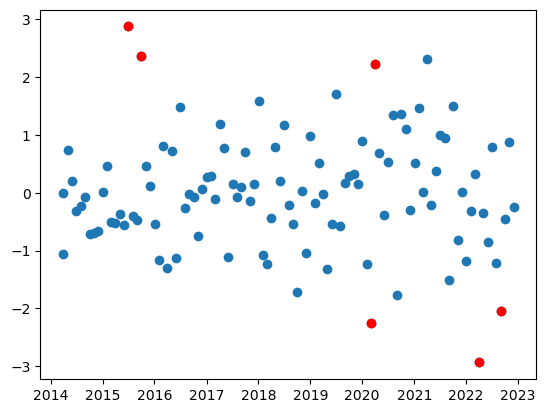

In [139]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.05)
model.fit(df[['Return']])

# Predicting anomalies

df['Anomaly'] = model.predict(df[['Return']])
plt.scatter(df['Month Starting'], df['Return'])
plt.scatter(df[df['Anomaly'] == -1]['Month Starting'], df[df['Anomaly'] == -1]['Return'], color='red')

/Users/hangyulson/opt/anaconda3/envs/comp4221/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


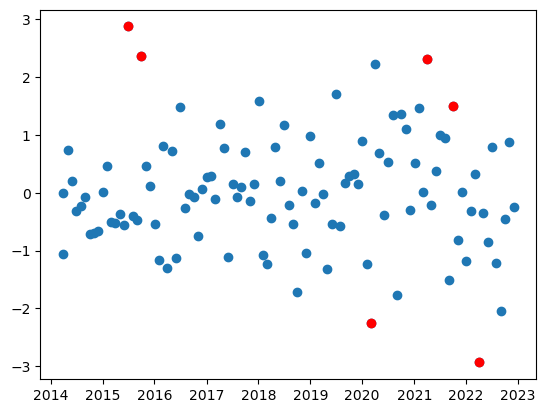

In [140]:
#Consider two features instead of one
model = IsolationForest(contamination=0.05)
model.fit(df[['Return', 'Close']])

# Predicting anomalies
df['Anomaly'] = model.predict(df[['Return','Close']])
plt.scatter(df['Month Starting'], df['Return'])
plt.scatter(df[df['Anomaly'] == -1]['Month Starting'], df[df['Anomaly'] == -1]['Return'], color='red')